In [1]:
import random

import os.path as op
import pandas as pd

from scripts.utils import get_path
from funcs.plots import Fig2CMethods

In [2]:
data_path = get_path("dataframes")
fig_dir = get_path("figures")

trials_data = pd.read_pickle(op.join(data_path, "individual_trials_data.pkl"))
random_audiograms = pd.read_pickle(op.join(data_path, "global_random_audiograms.pkl"))
pseudo_psychometric_curves = pd.read_pickle(op.join(data_path, "sigmoid_data.pkl"))

### Choose participant and condition

In [3]:
# participant = random.choice(trials_data.participant.unique())
participant = 'udoety'  # 'klxufm' 'udoety' 'quicsb' 'moiern'

# paradigm = random.choice(trials_data.paradigm.unique())
paradigm = 'Continuous'

# pred = paradigm if paradigm in ['3AFC', 'Bayesian'] else random.choice(['both', 'frequency', 'time', 'none'])
pred = 'time'

print(f"Plotting example data for {participant} ({paradigm}{'' if paradigm in ['3AFC', 'Bayesian'] else f', {pred}'})")

Plotting example data for udoety (Continuous, time)


In [4]:
# Filter data
random_audiogram = random_audiograms.loc[random_audiograms.participant == participant]

trials_data = trials_data.loc[(trials_data.participant == participant)
                                     & (trials_data.paradigm == paradigm)
                                     & (trials_data.pred == pred)]

trials_data.reset_index(inplace=True)

sigmoid = pseudo_psychometric_curves.loc[(pseudo_psychometric_curves.participant == participant) & (pseudo_psychometric_curves.paradigm == paradigm) & (pseudo_psychometric_curves.pred == pred)]

In [5]:
# Create an instance of the class with your data
method_figures = Fig2CMethods(random_audiogram, sigmoid, trials_data, paradigm, pred)

### Fig2C - Plot global random audiogram


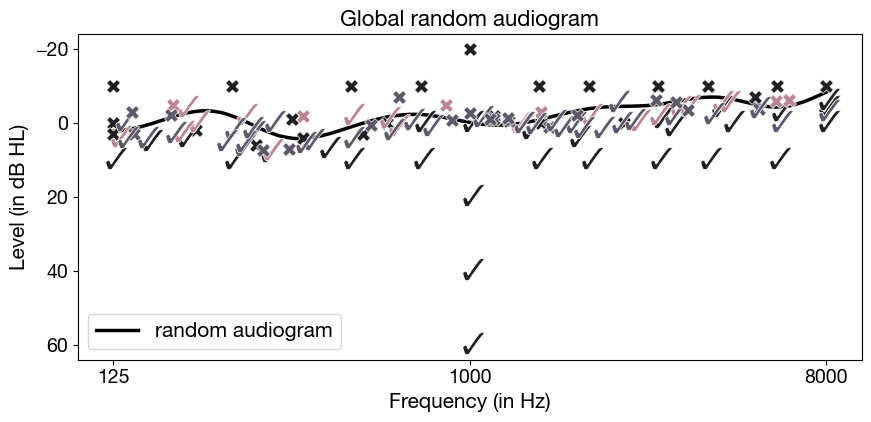

In [6]:
# Plot random trials and resulting global random audiogram
figure = method_figures.plot_example_global_random_audiogram()
figure.savefig(op.join(fig_dir, "Fig2C-global_random_audiogram.svg"))

### Fig2C - Plot tested tone's distances from GRT

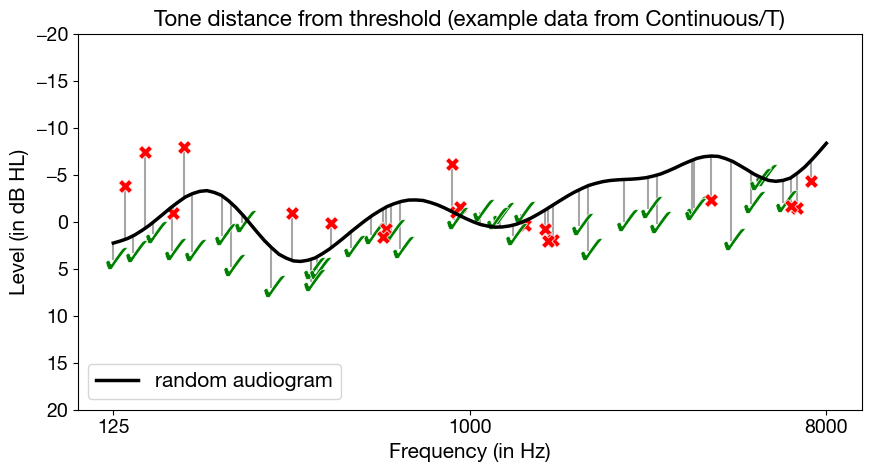

In [7]:
fig = method_figures.plot_example_distances()
fig.savefig(op.join(fig_dir, "Fig2C-distance_to_random_audiogram.svg"))

### Fig2C - Plot sigmoid and p50 value

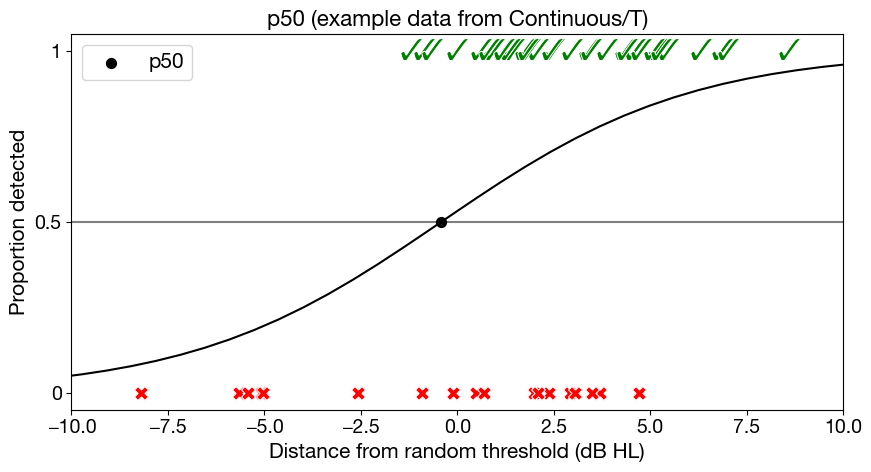

In [8]:
fig = method_figures.plot_example_sigmoid()
fig.savefig(op.join(fig_dir, "Fig2C-sigmoid_and_responses.svg"))